# Feature Ranking


### 1. Minimum Redundancy Maximum Relevance

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pathlib import Path
from mrmr import mrmr_classif
import warnings
warnings.filterwarnings('ignore')

In [6]:
data_dir = f"{Path.cwd().parent.parent}/data"

In [7]:
selected_features_df = pd.read_csv(f'{data_dir}/boruta_selected_features.csv') 
filtered_series_matrix = pd.read_csv(f'{data_dir}/filtered_expression_matrix.csv')
sample_labels = pd.read_csv(f'{data_dir}/GSE120584_sample_labels.csv')

In [8]:
filtered_series_matrix.set_index('ID_REF').transpose()

ID_REF,MIMAT0000245,MIMAT0005588,MIMAT0005905,MIMAT0007349,MIMAT0007401,MIMAT0012735,MIMAT0014984,MIMAT0015064,MIMAT0016849,MIMAT0016889,...,MIMAT0027455,MIMAT0027468,MIMAT0027488,MIMAT0027512,MIMAT0027559,MIMAT0027565,MIMAT0027575,MIMAT0027583,MIMAT0027650,MIMAT0030429
GSM3403761,3.247633,4.666568,6.424362,4.314688,4.302577,6.650482,4.238956,8.011701,10.500005,8.523402,...,5.275861,12.611517,8.237558,6.529971,3.622694,3.235115,8.941666,8.708576,9.349540,3.870470
GSM3403762,3.322302,4.239831,5.908149,4.202207,3.655424,6.558620,3.984927,8.076476,10.529963,8.490272,...,5.401522,12.352932,8.447908,6.375578,3.564422,3.414534,8.746977,8.265670,9.189681,4.857441
GSM3403763,3.832967,3.841522,5.786100,3.974663,3.967952,6.485145,3.510813,8.778496,9.664737,8.609705,...,5.360779,12.854630,8.483502,6.609619,3.826803,3.400731,8.727991,8.239926,9.783502,2.941832
GSM3403764,3.099451,4.553042,6.202725,4.258664,3.724011,6.697673,4.021334,7.672666,10.533419,8.901371,...,5.423035,12.364354,8.053725,7.169810,2.596518,2.117638,8.872228,8.677822,8.823568,2.940942
GSM3403765,3.972978,4.213964,6.438405,4.458520,3.179096,6.520311,3.179096,7.671334,10.554191,8.822575,...,4.964842,12.327902,7.974729,6.399604,4.104722,3.179096,8.924293,8.607664,9.011754,4.008777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3405357,2.755368,4.321873,7.085877,4.856806,2.321851,7.076784,5.177382,7.916001,11.345804,8.494325,...,5.614878,12.790379,8.198811,6.937548,3.844585,3.187042,9.238711,9.095730,9.473596,4.434988
GSM3405358,3.247889,4.677839,6.681850,4.574527,4.004131,7.215211,4.141063,8.617582,10.899580,8.960655,...,5.834998,13.517037,8.814521,6.820251,4.444684,3.247889,9.405115,8.893351,10.032701,3.247889
GSM3405359,4.054153,4.697839,7.013891,4.858040,4.048914,6.706661,5.440901,8.022583,11.241062,8.867058,...,5.346011,12.455277,8.340961,5.981719,2.797777,3.783744,8.690911,8.476562,9.420849,4.188238
GSM3405360,3.463225,4.651253,6.715800,4.695997,3.743187,6.854207,4.897255,8.303287,11.194294,8.610445,...,5.322002,12.836729,8.451316,6.440157,3.927342,3.224683,9.102245,8.059508,9.610215,3.111256


In [9]:
X = filtered_series_matrix.set_index('ID_REF').transpose()
y = np.array([sample_labels[sample_labels['Sample ID'] == sample_id]['LABEL'] for sample_id in filtered_series_matrix.columns[1:]]).flatten()
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1601, 30)
y shape: (1601,)


In [16]:
selected_features = mrmr_classif(
    X=X, 
    y=y, 
    K=X.shape[1], 
    relevance='f', 
    redundancy='c', 
    denominator='mean' 
)  
for i, feature in enumerate(selected_features):
    print(f"{i+1}. {feature}")

# Save mRMR ranking
mrmr_ranking_df = pd.DataFrame({
    'mrmr_rank': range(1, len(selected_features) + 1),
    'feature_name': selected_features
})
mrmr_ranking_df.to_csv(f'{data_dir}/mrmr_feature_ranking.csv', index=False)

100%|██████████| 30/30 [00:04<00:00,  6.89it/s]

1. MIMAT0027423
2. MIMAT0027468
3. MIMAT0016889
4. MIMAT0014984
5. MIMAT0027455
6. MIMAT0027512
7. MIMAT0022731
8. MIMAT0015064
9. MIMAT0007349
10. MIMAT0026474
11. MIMAT0019893
12. MIMAT0027575
13. MIMAT0027583
14. MIMAT0018004
15. MIMAT0019743
16. MIMAT0005588
17. MIMAT0019858
18. MIMAT0027559
19. MIMAT0027650
20. MIMAT0022491
21. MIMAT0005905
22. MIMAT0027404
23. MIMAT0026477
24. MIMAT0000245
25. MIMAT0027565
26. MIMAT0027488
27. MIMAT0012735
28. MIMAT0007401
29. MIMAT0016849
30. MIMAT0030429


In [11]:
X.head()

ID_REF,MIMAT0000245,MIMAT0005588,MIMAT0005905,MIMAT0007349,MIMAT0007401,MIMAT0012735,MIMAT0014984,MIMAT0015064,MIMAT0016849,MIMAT0016889,...,MIMAT0027455,MIMAT0027468,MIMAT0027488,MIMAT0027512,MIMAT0027559,MIMAT0027565,MIMAT0027575,MIMAT0027583,MIMAT0027650,MIMAT0030429
GSM3403761,3.247633,4.666568,6.424362,4.314688,4.302577,6.650482,4.238956,8.011701,10.500005,8.523402,...,5.275861,12.611517,8.237558,6.529971,3.622694,3.235115,8.941666,8.708576,9.349540,3.870470
GSM3403762,3.322302,4.239831,5.908149,4.202207,3.655424,6.558620,3.984927,8.076476,10.529963,8.490272,...,5.401522,12.352932,8.447908,6.375578,3.564422,3.414534,8.746977,8.265670,9.189681,4.857441
GSM3403763,3.832967,3.841522,5.786100,3.974663,3.967952,6.485145,3.510813,8.778496,9.664737,8.609705,...,5.360779,12.854630,8.483502,6.609619,3.826803,3.400731,8.727991,8.239926,9.783502,2.941832
GSM3403764,3.099451,4.553042,6.202725,4.258664,3.724011,6.697673,4.021334,7.672666,10.533419,8.901371,...,5.423035,12.364354,8.053725,7.169810,2.596518,2.117638,8.872228,8.677822,8.823568,2.940942
GSM3403765,3.972978,4.213964,6.438405,4.458520,3.179096,6.520311,3.179096,7.671334,10.554191,8.822575,...,4.964842,12.327902,7.974729,6.399604,4.104722,3.179096,8.924293,8.607664,9.011754,4.008777


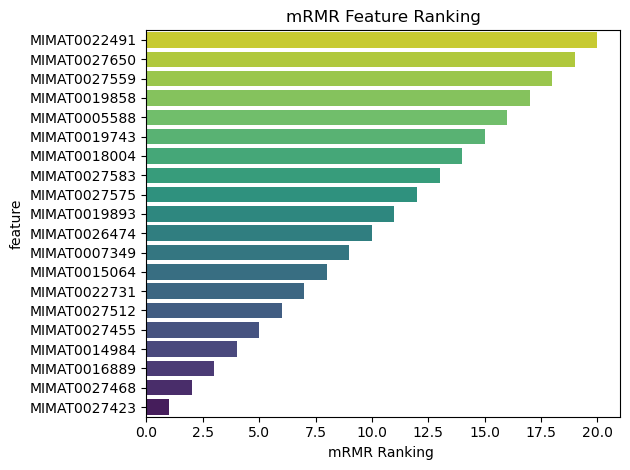

In [12]:
sns.barplot(data=mrmr_ranking_df.head(20), x='rank', y='feature', palette='viridis')
  
plt.xlabel('mRMR Ranking ')
plt.title('mRMR Feature Ranking')
plt.gca().invert_yaxis()  # Most important at top
 
plt.tight_layout()

plt.show()

### Monte Carlo Feature Selection (MCFS)

In [13]:
from myworkspaceutils.feature_selection.mcfs import monte_carlo_feature_selection

In [14]:
# Run MCFS
print("Starting Monte Carlo Feature Selection...")
mcfs_ranking, mcfs_scores = monte_carlo_feature_selection(X, y, n_iterations=100)

# Save MCFS results
mcfs_ranking_df = pd.DataFrame({
    'mcfs_rank': range(1, len(mcfs_ranking) + 1),
    'feature_name': mcfs_ranking,
    'importance_score': mcfs_scores
})
mcfs_ranking_df.to_csv(f'{data_dir}/mcfs_feature_ranking.csv', index=False)
 
print("\nTop 10 features:")
print(mcfs_ranking_df.head(10))

Starting Monte Carlo Feature Selection...
Running MCFS with 100 iterations...


  Iteration 80/100: 100%|██████████| 100/100 [00:15<00:00,  6.27it/s]


Top 10 features:
   mcfs_rank  feature_name  importance_score
0          1  MIMAT0027575          0.040921
1          2  MIMAT0014984          0.040768
2          3  MIMAT0027512          0.040183
3          4  MIMAT0007349          0.039983
4          5  MIMAT0027423          0.037572
5          6  MIMAT0027559          0.035836
6          7  MIMAT0000245          0.035662
7          8  MIMAT0016889          0.035621
8          9  MIMAT0027404          0.035122
9         10  MIMAT0018004          0.035109


#### mRMR vs MCFS ####

In [17]:
comparison_df = pd.merge(
    mrmr_ranking_df[['mrmr_rank', 'feature_name']],
    mcfs_ranking_df[['mcfs_rank', 'feature_name', 'importance_score']],
    on='feature_name',
    how='outer'
)

print("Comparison of mRMR vs MCFS rankings:")
print(comparison_df.sort_values('mcfs_rank').head(15))

# Save comparison
comparison_df.to_csv(f'{data_dir}/feature_ranking_comparison.csv', index=False)

Comparison of mRMR vs MCFS rankings:
    mrmr_rank  feature_name  mcfs_rank  importance_score
11         12  MIMAT0027575          1          0.040921
3           4  MIMAT0014984          2          0.040768
5           6  MIMAT0027512          3          0.040183
8           9  MIMAT0007349          4          0.039983
0           1  MIMAT0027423          5          0.037572
17         18  MIMAT0027559          6          0.035836
23         24  MIMAT0000245          7          0.035662
2           3  MIMAT0016889          8          0.035621
21         22  MIMAT0027404          9          0.035122
13         14  MIMAT0018004         10          0.035109
14         15  MIMAT0019743         11          0.035083
20         21  MIMAT0005905         12          0.034972
25         26  MIMAT0027488         13          0.034468
19         20  MIMAT0022491         14          0.034377
29         30  MIMAT0030429         15          0.032629


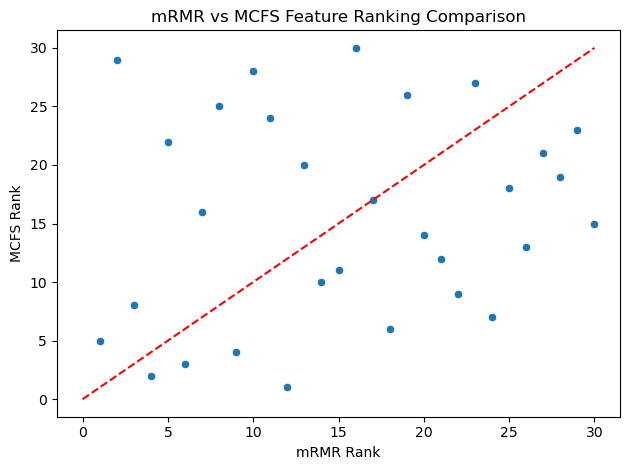

In [18]:
sns.scatterplot(data=comparison_df, x='mrmr_rank', y='mcfs_rank')
plt.plot([0, max(comparison_df['mrmr_rank'].max(), comparison_df['mcfs_rank'].max())],
         [0, max(comparison_df['mrmr_rank'].max(), comparison_df['mcfs_rank'].max())],
         color='red', linestyle='--')
plt.xlabel('mRMR Rank')
plt.ylabel('MCFS Rank')
plt.title('mRMR vs MCFS Feature Ranking Comparison')
plt.tight_layout()
plt.show()